In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

dataset: https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data

Using device: cuda:0


In [5]:
dataset = pd.read_csv('housing_price_dataset.csv')

# Data Preprocessing

In [6]:
dataset.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [7]:
dataset.shape

(50000, 6)

In [8]:
dataset.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [10]:
dataset.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [11]:
# Numerical columns
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price'], dtype='object')

In [12]:
# categorical columns
dataset.select_dtypes(include='object').columns

Index(['Neighborhood'], dtype='object')

Missing data

In [13]:
dataset.isnull().values.any()

False

In [14]:
dataset.isnull().values.sum()

0

Categorical

In [15]:
dataset['Neighborhood'].unique()

array(['Rural', 'Suburb', 'Urban'], dtype=object)

In [16]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [17]:
dataset.shape

(50000, 7)

In [18]:
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

In [19]:
dataset.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,False,False
1,2459,3,2,1980,195014.221626,False,False
2,1860,2,1,1970,306891.012076,True,False
3,2294,2,1,1996,206786.787153,False,True
4,2130,5,2,2001,272436.239065,True,False


Restructure

In [20]:
dataset['Current Year'] = 2024
dataset['Years Old'] = dataset['Current Year'] - dataset['YearBuilt']
dataset.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Suburb,Neighborhood_Urban,Current Year,Years Old
0,2126,4,1,1969,215355.283618,False,False,2024,55
1,2459,3,2,1980,195014.221626,False,False,2024,44
2,1860,2,1,1970,306891.012076,True,False,2024,54
3,2294,2,1,1996,206786.787153,False,True,2024,28
4,2130,5,2,2001,272436.239065,True,False,2024,23


In [21]:
dataset = dataset.drop(columns=['Current Year', 'YearBuilt'])

In [22]:
dataset.head()

,SquareFeet,Bedrooms,Bathrooms,Price,Neighborhood_Suburb,Neighborhood_Urban,Years Old
0,2126,4,1,215355.283618,False,False,55
1,2459,3,2,195014.221626,False,False,44
2,1860,2,1,306891.012076,True,False,54
3,2294,2,1,206786.787153,False,True,28
4,2130,5,2,272436.239065,True,False,23


## Displot and Correlation

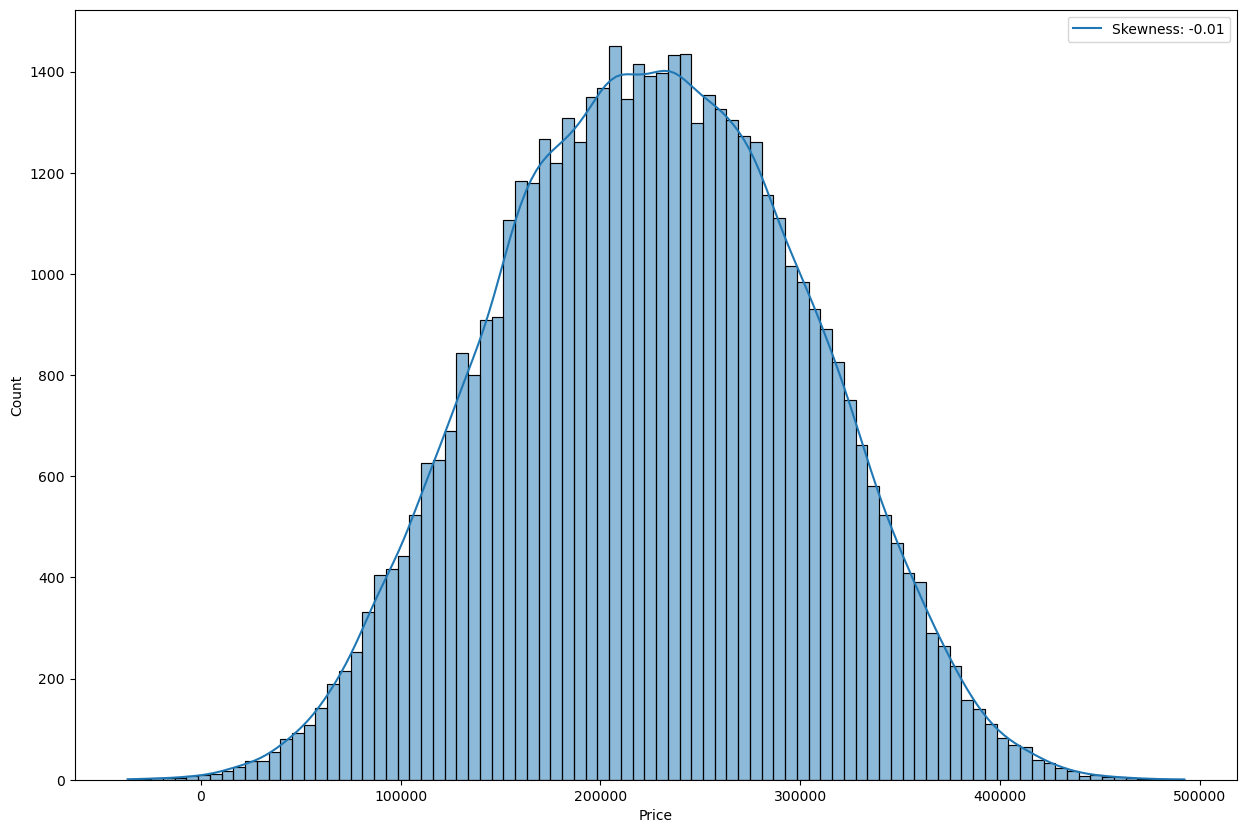

In [23]:
# distplot of the target variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,10))
# bar = sns.distplot(dataset['Price'])
bar = sns.histplot(dataset['Price'], kde=True)
bar.legend(["Skewness: {:.2f}".format(dataset['Price'].skew())])
plt.show()

In [24]:
# Correlation
dataset_2 = dataset.drop(columns='Price')

In [25]:
dataset_2.shape

(50000, 6)

<Axes: title={'center': 'Correlated with Price'}>

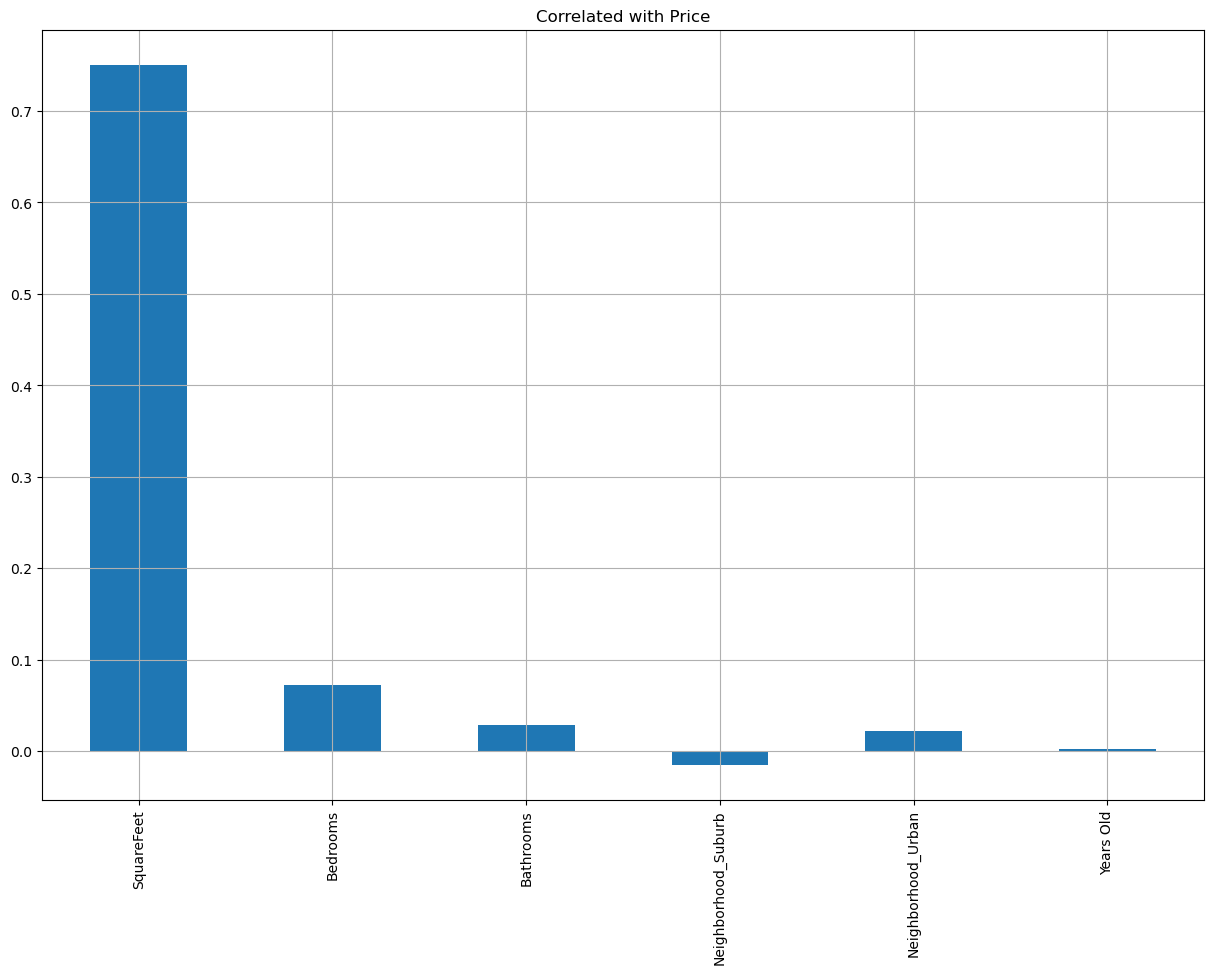

In [26]:
dataset_2.corrwith(dataset['Price']).plot.bar(
    figsize=(15,10), title='Correlated with Price', grid=True
)

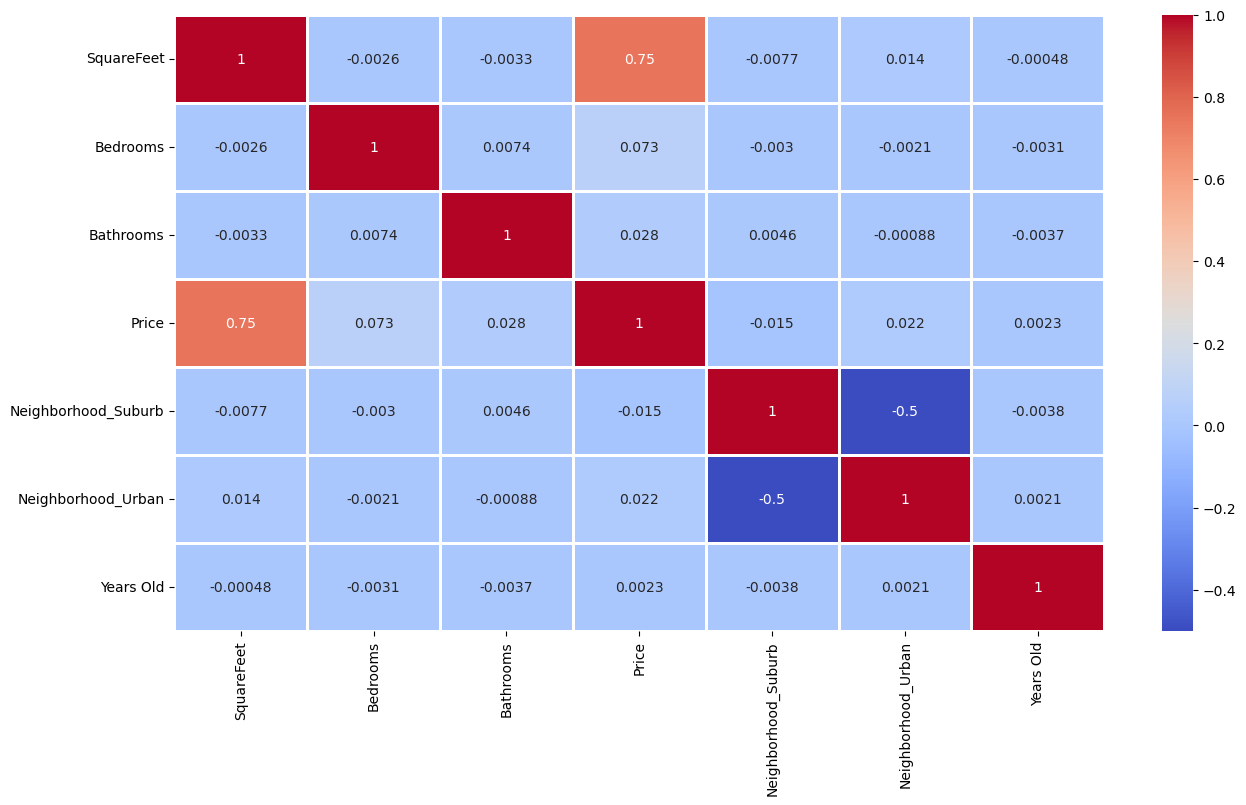

In [27]:
# heatmap
plt.figure(figsize=(15, 8))
ax = sns.heatmap(data=dataset.corr(), cmap='coolwarm', annot=True, linewidths=2)

## Split and standardize the dataset

In [28]:
# independ variables / matrix of features
x = dataset.drop(columns='Price')

In [29]:
# target variable / dependent variable
y = dataset['Price']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
x_train.shape

(40000, 6)

In [32]:
y_test.shape

(10000,)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modelling

## 1) XGBoost

In [34]:
from xgboost import XGBRFRegressor
xgb = XGBRFRegressor()
xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [35]:
y_pred = xgb.predict(x_test)

In [36]:
# Calculate R-squared (R2 score)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 score): {r2}")

R-squared (R2 score): 0.5735203318575485


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

#MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

#RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 39480.18012667472
Mean Squared Error (MSE): 2447973404.9811397
Root Mean Squared Error (RMSE): 49476.99874670188


In [38]:
results = pd.DataFrame([['XGBoost', r2, mae, mse, rmse]],
                       columns=['Model', 'R2 score', 'MAE', 'MSE', 'RMSE'])

In [39]:
results

,Model,R2 score,MAE,MSE,RMSE
0,XGBoost,0.57352,39480.180127,2.447973e+09,49476.998747


## 2) KNN

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [41]:
y_pred = knn_regressor.predict(x_test)

In [42]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 score): {r2}")

R-squared (R2 score): 0.4852216926748557


In [43]:
#MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

#MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

#RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 43389.40756945734
Mean Squared Error (MSE): 2954803475.818323
Root Mean Squared Error (RMSE): 54358.10404915097


In [44]:
model_results = pd.DataFrame([['KNN', r2, mae, mse, rmse]],
                       columns=['Model', 'R2 score', 'MAE', 'MSE', 'RMSE'])
results = pd.concat([results, model_results], ignore_index=True)

In [45]:
results

,Model,R2 score,MAE,MSE,RMSE
0,XGBoost,0.573520,39480.180127,2.447973e+09,49476.998747
1,KNN,0.485222,43389.407569,2.954803e+09,54358.104049


## 3) Neural Network

In [46]:
from sklearn.neural_network import MLPRegressor
nn_regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=700, random_state=42)
nn_regressor.fit(x_train, y_train)

c:\Users\seung\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=700, random_state=42)

In [47]:
y_pred = nn_regressor.predict(x_test)

In [48]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 score): {r2}")

R-squared (R2 score): 0.561863906181427


In [49]:
#MAE
mae = mean_absolute_error(y_test, y_pred)

#MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

model_results = pd.DataFrame([['Neural_Network', r2, mae, mse, rmse]],
                       columns=['Model', 'R2 score', 'MAE', 'MSE', 'RMSE'])
results = pd.concat([results, model_results], ignore_index=True)

In [50]:
results

,Model,R2 score,MAE,MSE,RMSE
0,XGBoost,0.573520,39480.180127,2.447973e+09,49476.998747
1,KNN,0.485222,43389.407569,2.954803e+09,54358.104049
2,Neural_Network,0.561864,40038.223818,2.514881e+09,50148.586667


## 4) SVM

In [51]:
from sklearn.svm import SVR

# Initialize and train SVR
svr = SVR(C=1.0, epsilon=0.1, kernel='rbf')
svr.fit(x_train, y_train)

SVR()

In [52]:
y_pred = svr.predict(x_test)

In [53]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 score): {r2}")

R-squared (R2 score): 0.027024272162453178


In [54]:
#MAE
mae = mean_absolute_error(y_test, y_pred)

#MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

model_results = pd.DataFrame([['SVM', r2, mae, mse, rmse]],
                       columns=['Model', 'R2 score', 'MAE', 'MSE', 'RMSE'])
results = pd.concat([results, model_results], ignore_index=True)

In [55]:
results

,Model,R2 score,MAE,MSE,RMSE
0,XGBoost,0.573520,39480.180127,2.447973e+09,49476.998747
1,KNN,0.485222,43389.407569,2.954803e+09,54358.104049
2,Neural_Network,0.561864,40038.223818,2.514881e+09,50148.586667
3,SVM,0.027024,60869.208901,5.584835e+09,74731.755634


## 5) Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train Decision Tree Regressor
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [57]:
y_pred = dtr.predict(x_test)

In [58]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 score): {r2}")

R-squared (R2 score): 0.5713777723135853


In [59]:
#MAE
mae = mean_absolute_error(y_test, y_pred)

#MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

model_results = pd.DataFrame([['Decision_tree', r2, mae, mse, rmse]],
                       columns=['Model', 'R2 score', 'MAE', 'MSE', 'RMSE'])
results = pd.concat([results, model_results], ignore_index=True)

In [60]:
results

,Model,R2 score,MAE,MSE,RMSE
0,XGBoost,0.573520,39480.180127,2.447973e+09,49476.998747
1,KNN,0.485222,43389.407569,2.954803e+09,54358.104049
2,Neural_Network,0.561864,40038.223818,2.514881e+09,50148.586667
3,SVM,0.027024,60869.208901,5.584835e+09,74731.755634
4,Decision_tree,0.571378,39601.905779,2.460272e+09,49601.124955


## 6) Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [62]:
y_pred = rf_regressor.predict(x_test)

In [63]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 score): {r2}")

R-squared (R2 score): 0.5741169354968438


In [64]:
#MAE
mae = mean_absolute_error(y_test, y_pred)

#MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

model_results = pd.DataFrame([['Random Forest', r2, mae, mse, rmse]],
                       columns=['Model', 'R2 score', 'MAE', 'MSE', 'RMSE'])
results = pd.concat([results, model_results], ignore_index=True)

In [65]:
results

,Model,R2 score,MAE,MSE,RMSE
0,XGBoost,0.573520,39480.180127,2.447973e+09,49476.998747
1,KNN,0.485222,43389.407569,2.954803e+09,54358.104049
2,Neural_Network,0.561864,40038.223818,2.514881e+09,50148.586667
3,SVM,0.027024,60869.208901,5.584835e+09,74731.755634
4,Decision_tree,0.571378,39601.905779,2.460272e+09,49601.124955
5,Random Forest,0.574117,39484.201260,2.444549e+09,49442.379877


## Stacking

In [66]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

estimator_list = [
    ('xgb',xgb),
    ('nn_regressor',nn_regressor),
    ('dtr',dtr),
    ('rf_regressor',rf_regressor)
    ]

# Build stack model
stack_model = StackingRegressor(
    estimators=estimator_list, final_estimator= LinearRegression()
)

# Train stacked model
stack_model.fit(x_train, y_train)


c:\Users\seung\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\seung\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\seung\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\seung\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\seung\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

StackingRegressor(estimators=[('xgb',
                               XGBRFRegressor(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              max_bin=None,
                                              max_cat_threshold=...
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='reg:squarederror',
                                              random_state=None, reg_alpha=None, ...)),
                              ('nn_regressor',
                               MLPRegressor(max_iter=700, random_state=42)),
                              ('dtr',
                               DecisionTreeRegressor(max_depth=5,
                                                     random_state=42)),
                              ('rf_regressor',
                               RandomForestRegressor(max_depth=5,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [67]:
y_pred = stack_model.predict(x_test)

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5743505615964937

In [69]:
#MAE
mae = mean_absolute_error(y_test, y_pred)

#MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

model_results = pd.DataFrame([['meta', r2, mae, mse, rmse]],
                       columns=['Model', 'R2 score', 'MAE', 'MSE', 'RMSE'])
results = pd.concat([results, model_results], ignore_index=True)

In [70]:
results

,Model,R2 score,MAE,MSE,RMSE
0,XGBoost,0.573520,39480.180127,2.447973e+09,49476.998747
1,KNN,0.485222,43389.407569,2.954803e+09,54358.104049
2,Neural_Network,0.561864,40038.223818,2.514881e+09,50148.586667
3,SVM,0.027024,60869.208901,5.584835e+09,74731.755634
4,Decision_tree,0.571378,39601.905779,2.460272e+09,49601.124955
5,Random Forest,0.574117,39484.201260,2.444549e+09,49442.379877
6,meta,0.574117,39456.247044,2.443208e+09,49428.816747


# Parameter tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

parameters = {
    'xgb__n_estimators': randint(100, 1000),
    'xgb__max_depth': randint(3, 10),
    'nn_regressor__hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'nn_regressor__alpha': uniform(0.0001, 0.1),
    'dtr__max_depth': randint(3, 10),
    'rf_regressor__n_estimators': randint(100, 1000),
    'rf_regressor__max_depth': randint(3, 10),

}

random_search = RandomizedSearchCV(estimator=stack_model, param_distributions=parameters,
                                   n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=StackingRegressor(estimators=[('xgb',
                                                            XGBRFRegressor(base_score=None,
                                                                           booster=None,
                                                                           callbacks=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bytree=None,
                                                                           device=None,
                                                                           early_stopping_rounds=None,
                                                                           enable_categorical=False,
                                                                           eval_metric=None,
                                                                           feature_types=None,
                                                                           gamma=None,
                                                                           grow_policy=None,
                                                                           importance_type=None,
                                                                           interaction_constraints=No...
                                        'rf_regressor__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002469A199A90>,
                                        'rf_regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002469A199150>,
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002469A18A390>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002469A18B410>},
                   random_state=42, verbose=2)

In [72]:
random_search.best_estimator_

StackingRegressor(estimators=[('xgb',
                               XGBRFRegressor(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              max_bin=None,
                                              max_cat_threshold=...
                                              objective='reg:squarederror',
                                              random_state=None, reg_alpha=None, ...)),
                              ('nn_regressor',
                               MLPRegressor(alpha=0.01844045098534338,
                                            hidden_layer_sizes=(100, 100),
                                            max_iter=700, random_state=42)),
                              ('dtr',
                               DecisionTreeRegressor(max_depth=6,
                                                     random_state=42)),
                              ('rf_regressor',
                               RandomForestRegressor(max_depth=4,
                                                     n_estimators=121,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [73]:
random_search.best_params_

{'dtr__max_depth': 6,
 'nn_regressor__alpha': 0.01844045098534338,
 'nn_regressor__hidden_layer_sizes': (100, 100),
 'rf_regressor__max_depth': 4,
 'rf_regressor__n_estimators': 121,
 'xgb__max_depth': 7,
 'xgb__n_estimators': 847}

In [74]:
from sklearn.ensemble import RandomForestRegressor
final = random_search.best_estimator_
final.fit(x_train, y_train)

StackingRegressor(estimators=[('xgb',
                               XGBRFRegressor(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              max_bin=None,
                                              max_cat_threshold=...
                                              objective='reg:squarederror',
                                              random_state=None, reg_alpha=None, ...)),
                              ('nn_regressor',
                               MLPRegressor(alpha=0.01844045098534338,
                                            hidden_layer_sizes=(100, 100),
                                            max_iter=700, random_state=42)),
                              ('dtr',
                               DecisionTreeRegressor(max_depth=6,
                                                     random_state=42)),
                              ('rf_regressor',
                               RandomForestRegressor(max_depth=4,
                                                     n_estimators=121,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [75]:
y_pred = final.predict(x_test)

In [76]:
r2_score(y_test, y_pred)

0.574594649604588

In [77]:
#MAE
mae = mean_absolute_error(y_test, y_pred)

#MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

model_results = pd.DataFrame([['meta_final', r2, mae, mse, rmse]],
                       columns=['Model', 'R2 score', 'MAE', 'MSE', 'RMSE'])
results = pd.concat([results, model_results], ignore_index=True)

In [78]:
results

,Model,R2 score,MAE,MSE,RMSE
0,XGBoost,0.573520,39480.180127,2.447973e+09,49476.998747
1,KNN,0.485222,43389.407569,2.954803e+09,54358.104049
2,Neural_Network,0.561864,40038.223818,2.514881e+09,50148.586667
3,SVM,0.027024,60869.208901,5.584835e+09,74731.755634
4,Decision_tree,0.571378,39601.905779,2.460272e+09,49601.124955
5,Random Forest,0.574117,39484.201260,2.444549e+09,49442.379877
6,meta,0.574117,39456.247044,2.443208e+09,49428.816747
7,meta_final,0.574117,39459.345233,2.441807e+09,49414.642276
